In [53]:
import pandas as pd

In [55]:
df= pd.read_excel("C:/Users/Florencia Cires/OneDrive/Documentos/Maximo/Datos limpios.xlsx")
df.head()

,AÑO,TOTAL,ORO,DIVISAS,total base monetaria,Billetes poder del publico,billetes bancos,base monetaria,Tipo de cambio,Prestamos bancarios % PBI
0,1917,604.8,306.5,298.27,0.000101,0.000047,0.000054,0.000105,2.278200e-13,25.732992
1,1918,703.5,366.8,336.68,0.000115,0.000050,0.000066,0.000119,2.240000e-13,25.971463
2,1919,735.3,376.1,359.19,0.000118,0.000057,0.000061,0.000121,2.300500e-13,28.173071
3,1920,839.2,455.8,383.43,0.000136,0.000051,0.000085,0.000141,2.541100e-13,27.101211
4,1921,824.9,453.8,371.07,0.000136,0.000047,0.000090,0.000141,3.143000e-13,29.696410


In [57]:
df.describe()

,AÑO,TOTAL,ORO,DIVISAS,total base monetaria,Billetes poder del publico,billetes bancos,base monetaria,Tipo de cambio,Prestamos bancarios % PBI
count,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,2.300000e+01,23.000000
mean,1928.00000,666.243478,414.757695,251.484479,0.000129,0.000073,0.000056,0.000139,3.017661e-13,28.100522
std,6.78233,183.712908,81.769130,163.321861,0.000010,0.000017,0.000016,0.000018,6.517055e-14,6.176370
min,1917.00000,405.100000,247.900000,-0.400000,0.000101,0.000047,0.000034,0.000105,2.240000e-13,16.235410
25%,1922.50000,478.000000,371.450000,89.610000,0.000123,0.000061,0.000040,0.000129,2.429700e-13,25.852227
50%,1928.00000,711.200000,436.200000,331.360000,0.000132,0.000073,0.000054,0.000138,2.904500e-13,28.919030
75%,1933.50000,790.700000,455.150000,355.930000,0.000136,0.000084,0.000065,0.000144,3.524850e-13,31.952097
max,1939.00000,1046.800000,552.800000,575.040000,0.000141,0.000101,0.000090,0.000180,4.328000e-13,38.227594


In [59]:
df.columns

Index(['AÑO', 'TOTAL', 'ORO', 'DIVISAS', 'total base monetaria',
       'Billetes poder del publico', 'billetes bancos', 'base monetaria',
       'Tipo de cambio', 'Prestamos bancarios % PBI'],
      dtype='object')

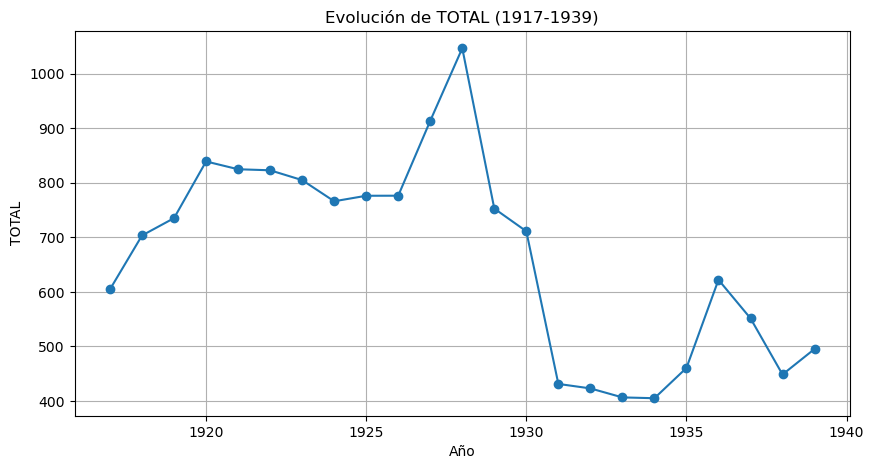

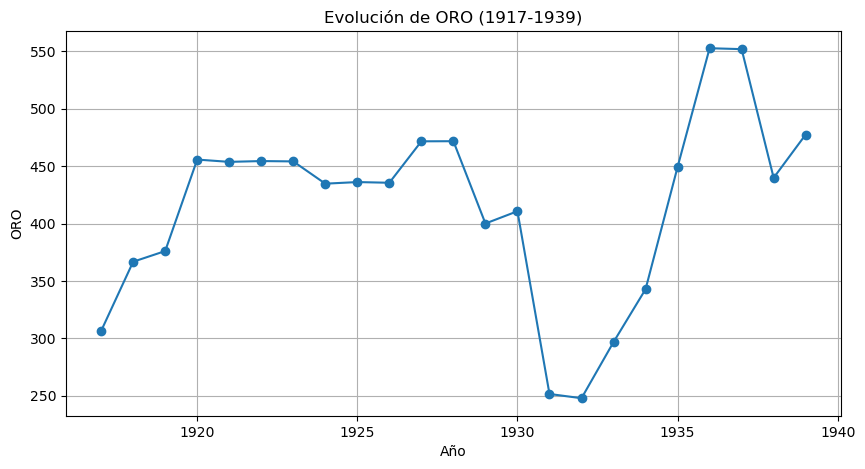

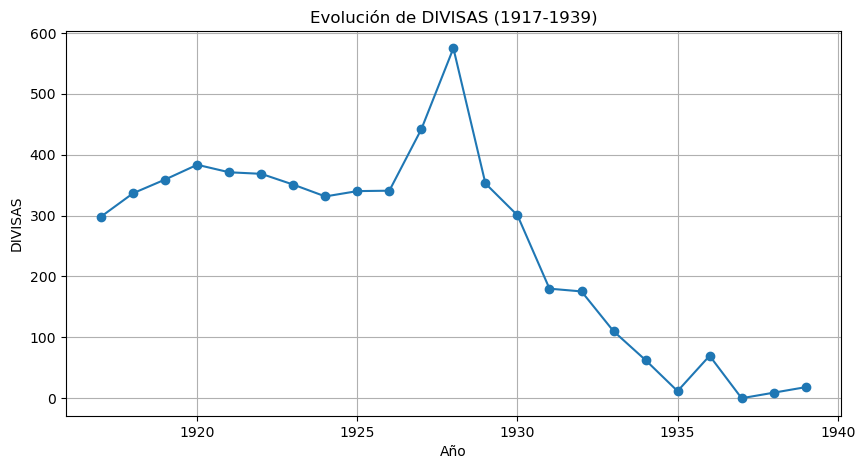

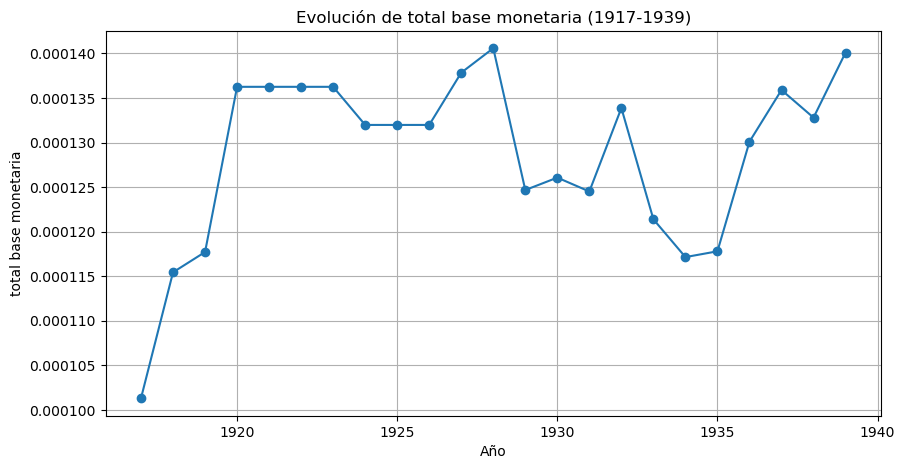

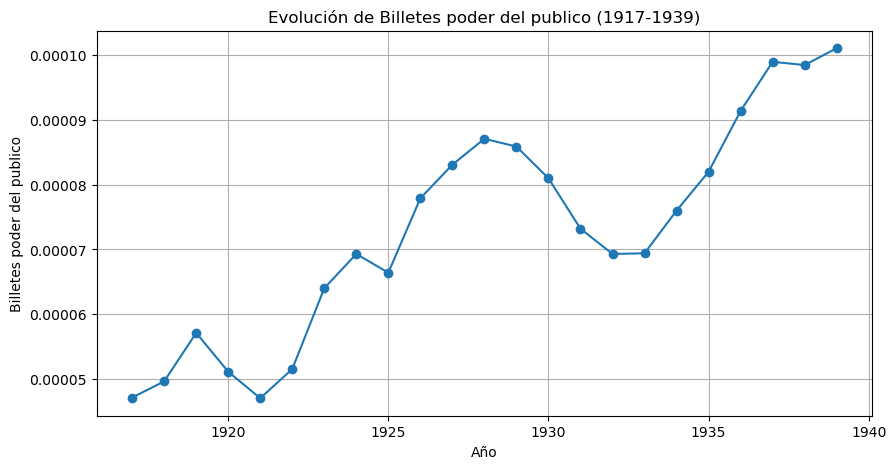

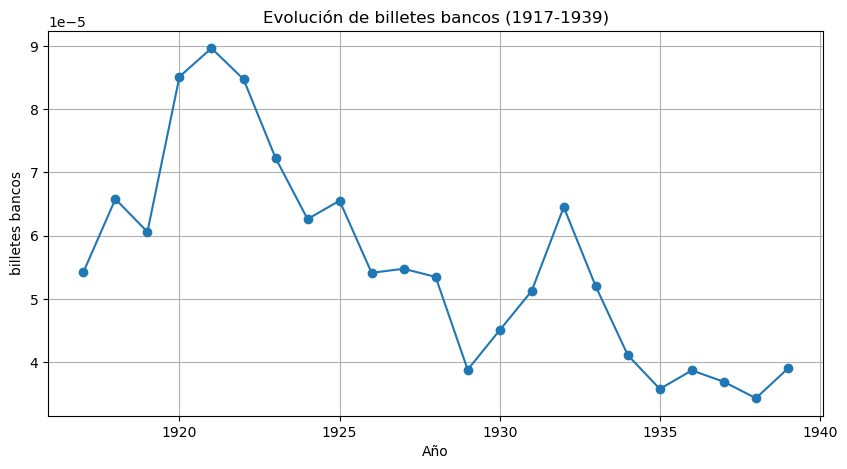

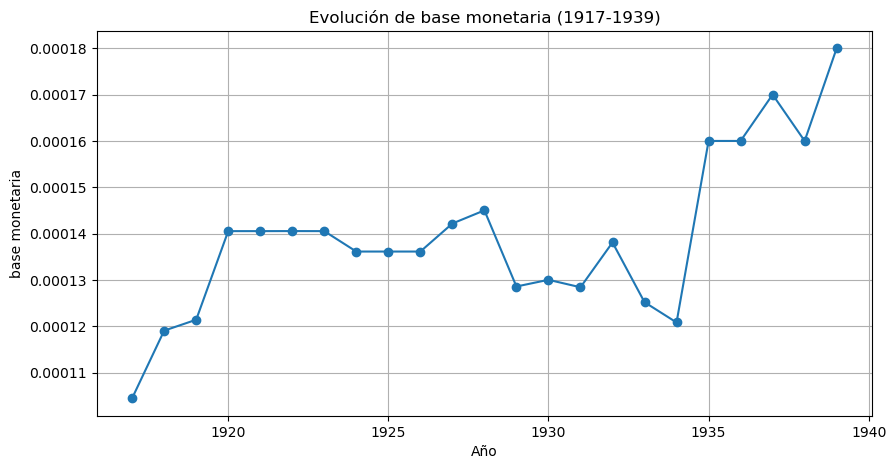

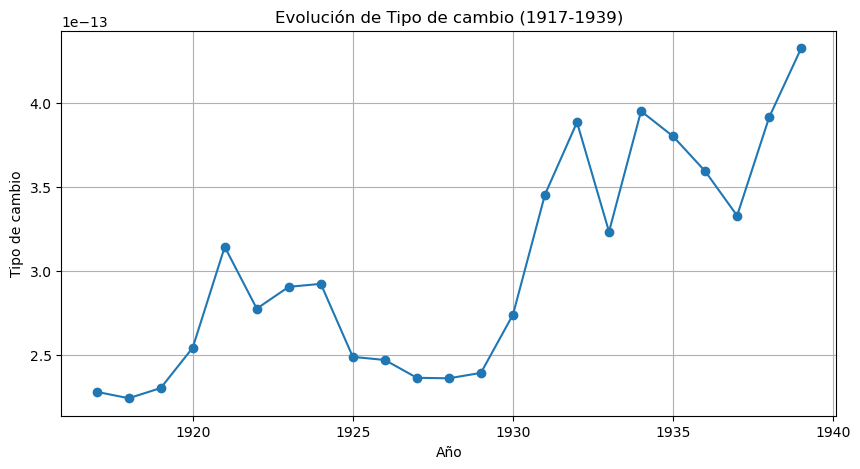

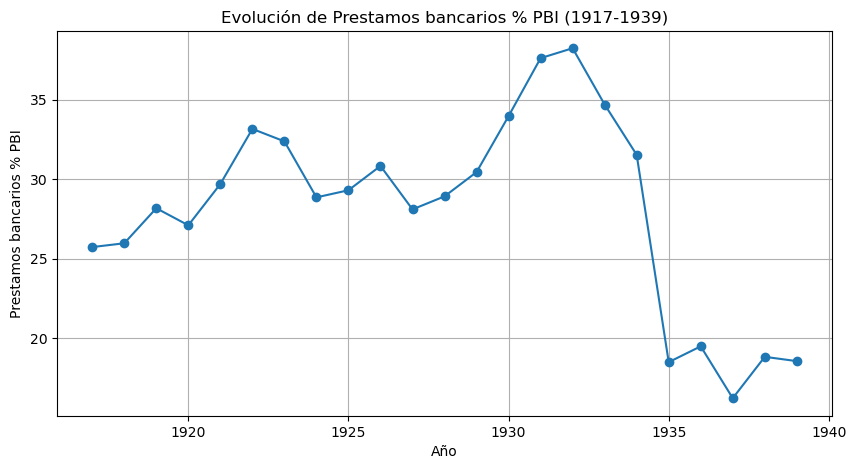

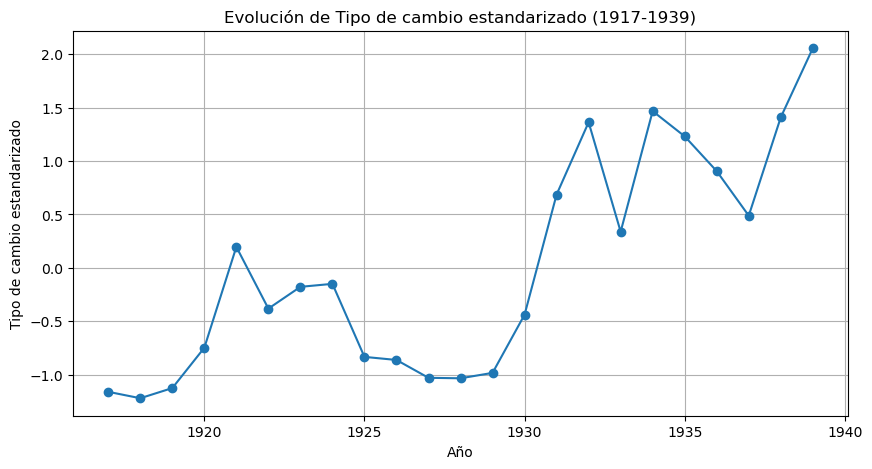

<Figure size 640x480 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt

# PARA GRAFICAR LAS SERIES DE CADA VARIABLE
for column in df.columns[1:]:
    plt.figure(figsize=(10, 5))
    plt.plot(df['AÑO'], df[column], marker='o')
    plt.title(f'Evolución de {column} (1917-1939)')
    plt.xlabel('Año')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

# Guardar en una carpeta específica (ejemplo de la carpeta Descargas en Windows)
plt.savefig('C:/Users/Florencia Cires/Downloads')

# Mostrar el gráfico (opcional, si también deseas visualizarlo en pantalla)
plt.show()

In [47]:
# Guardar en una carpeta específica (ejemplo de la carpeta Descargas en Windows)
plt.savefig('C:/Users/Florencia Cires/Downloads')

<Figure size 640x480 with 0 Axes>

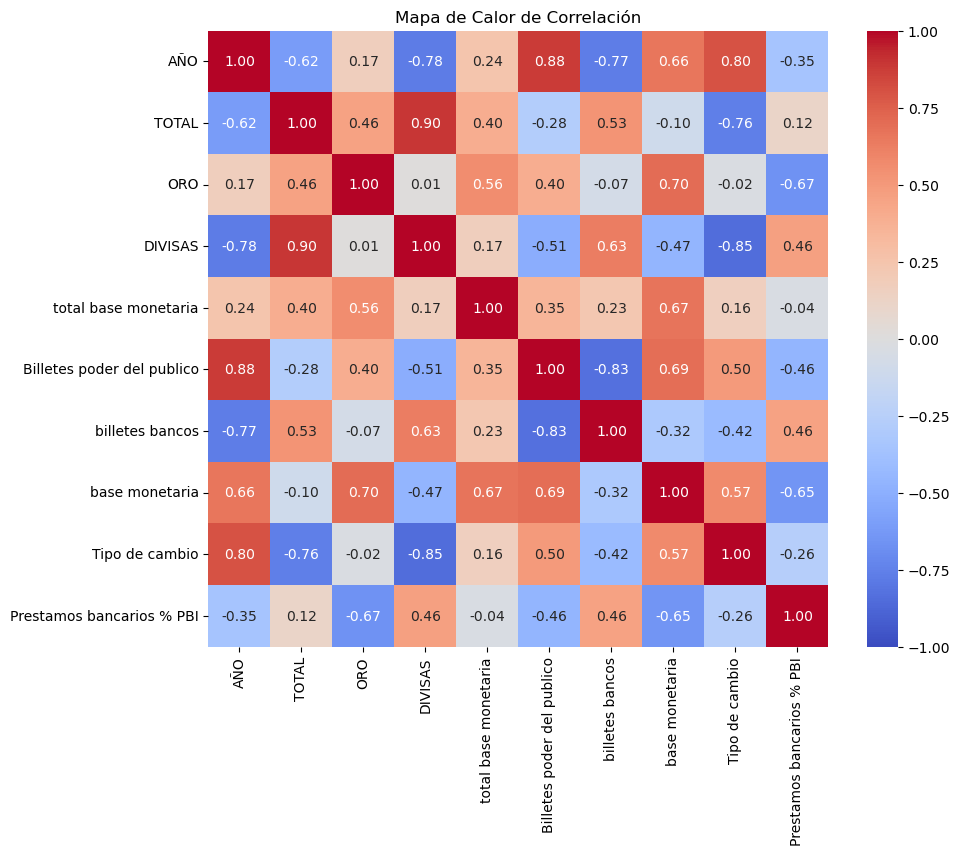

In [62]:
import seaborn as sns
import numpy as np

# Calculo la matriz de correlacion 
correlation_matrix = df.corr()

# MAPA DE COLOR 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()


In [64]:
import statsmodels.api as sm

# Definir variables dependiente e independientes
X = df[['TOTAL', 'ORO', 'DIVISAS', 'total base monetaria', 'Billetes poder del publico', 
        'billetes bancos', 'base monetaria', 'Prestamos bancarios % PBI']]
y = df['Tipo de cambio']

# Añadir constante para la regresión (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())


from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:         Tipo de cambio   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     13.98
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.86e-05
Time:                        09:57:54   Log-Likelihood:                 691.45
No. Observations:                  23   AIC:                            -1365.
Df Residuals:                      14   BIC:                            -1355.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Variables independientes
X = df[['ORO', 'DIVISAS', 'Billetes poder del publico']]
# Variable dependiente
y = df['Tipo de cambio']

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Coeficientes del modelo
coefficients = model.coef_
intercept = model.intercept_

print("Coeficientes:", coefficients)
print("Intercepto:", intercept)


Coeficientes: [-4.78971854e-17 -3.13332989e-16  4.65059525e-10]
Intercepto: 3.6650107149403897e-13


In [22]:
mean_values = X.mean()
std_values = X.std()

print("Media:\n", mean_values)
print("Desviación estándar:\n", std_values)


Media:
 ORO                           414.757695
DIVISAS                       251.484479
Billetes poder del publico      0.000073
dtype: float64
Desviación estándar:
 ORO                            81.769130
DIVISAS                       163.321861
Billetes poder del publico      0.000017
dtype: float64


In [24]:
# Número de simulaciones
n_simulations = 10000

# Generar valores aleatorios para cada variable según su distribución
simulated_oro = np.random.normal(mean_values['ORO'], std_values['ORO'], n_simulations)
simulated_divisas = np.random.normal(mean_values['DIVISAS'], std_values['DIVISAS'], n_simulations)
simulated_billetes = np.random.normal(mean_values['Billetes poder del publico'], std_values['Billetes poder del publico'], n_simulations)

# Calcular el tipo de cambio simulado
simulated_tipo_cambio = (
    coefficients[0] * simulated_oro + 
    coefficients[1] * simulated_divisas + 
    coefficients[2] * simulated_billetes + 
    intercept
)


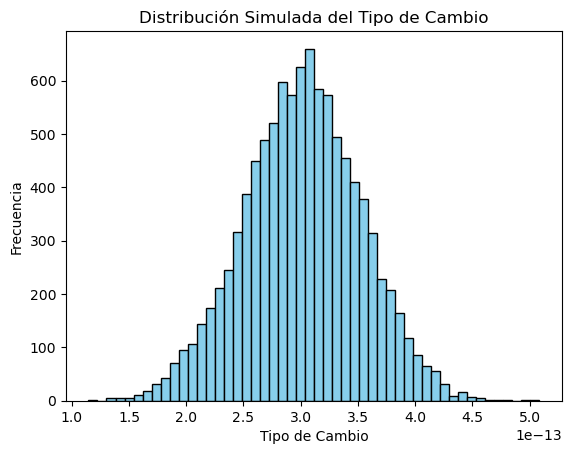

Tipo de cambio medio esperado: 0.0000
Percentil 5%: 0.0000
Mediana: 0.0000
Percentil 95%: 0.0000


In [26]:
import matplotlib.pyplot as plt

# Graficar la distribución del tipo de cambio simulado
plt.hist(simulated_tipo_cambio, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución Simulada del Tipo de Cambio')
plt.xlabel('Tipo de Cambio')
plt.ylabel('Frecuencia')
plt.show()

# Cálculo del tipo de cambio medio esperado y percentiles
mean_simulated = np.mean(simulated_tipo_cambio)
percentiles = np.percentile(simulated_tipo_cambio, [5, 50, 95])

print(f"Tipo de cambio medio esperado: {mean_simulated:.4f}")
print(f"Percentil 5%: {percentiles[0]:.4f}")
print(f"Mediana: {percentiles[1]:.4f}")
print(f"Percentil 95%: {percentiles[2]:.4f}")


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Datos históricos para entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en datos históricos: {mse:.4f}")


Error cuadrático medio en datos históricos: 0.0000


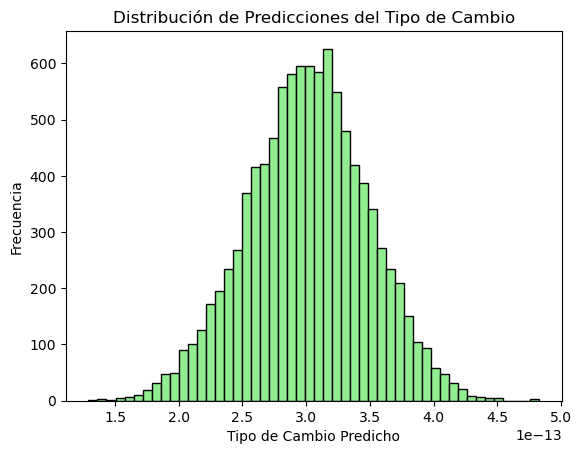

Tipo de cambio predicho medio: 0.0000
Percentil 5%: 0.0000
Mediana: 0.0000
Percentil 95%: 0.0000


In [30]:
# Crear un nuevo DataFrame con los datos simulados
simulated_data = pd.DataFrame({
    'ORO': simulated_oro,
    'DIVISAS': simulated_divisas,
    'Billetes poder del publico': simulated_billetes
})

# Predecir el tipo de cambio usando el modelo entrenado
predicted_tc = model.predict(simulated_data)

# Analizar las predicciones
plt.hist(predicted_tc, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribución de Predicciones del Tipo de Cambio')
plt.xlabel('Tipo de Cambio Predicho')
plt.ylabel('Frecuencia')
plt.show()

# Calcular la media y percentiles de las predicciones
mean_predicted_tc = np.mean(predicted_tc)
percentiles_predicted_tc = np.percentile(predicted_tc, [5, 50, 95])

print(f"Tipo de cambio predicho medio: {mean_predicted_tc:.4f}")
print(f"Percentil 5%: {percentiles_predicted_tc[0]:.4f}")
print(f"Mediana: {percentiles_predicted_tc[1]:.4f}")
print(f"Percentil 95%: {percentiles_predicted_tc[2]:.4f}")


In [31]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Estandarizar la columna 'Tipo de cambio'
df['Tipo de cambio estandarizado'] = scaler.fit_transform(df[['Tipo de cambio']])

# Verificar la nueva columna estandarizada
print(df[['AÑO', 'Tipo de cambio', 'Tipo de cambio estandarizado']].head())


    AÑO  Tipo de cambio  Tipo de cambio estandarizado
0  1917    2.278200e-13                     -1.160156
1  1918    2.240000e-13                     -1.220089
2  1919    2.300500e-13                     -1.125169
3  1920    2.541100e-13                     -0.747687
4  1921    3.143000e-13                      0.196647


C:\Users\Florencia Cires\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Tipo de cambio medio esperado (estandarizado): -0.0046
Percentil 5% (estandarizado): -1.3549
Mediana (estandarizado): 0.0069
Percentil 95% (estandarizado): 1.3050


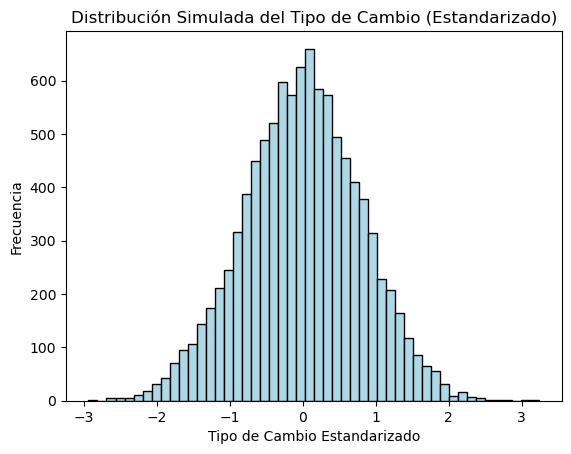

In [34]:
# Simular los datos del tipo de cambio (suponiendo que ya has generado la simulación)
simulated_tipo_cambio_estandarizado = scaler.transform(simulated_tipo_cambio.reshape(-1, 1))

# Recalcular la media y los percentiles con los datos estandarizados
mean_simulated = np.mean(simulated_tipo_cambio_estandarizado)
percentiles_predicted_tc = np.percentile(simulated_tipo_cambio_estandarizado, [5, 50, 95])

# Mostrar los resultados
print(f"Tipo de cambio medio esperado (estandarizado): {mean_simulated:.4f}")
print(f"Percentil 5% (estandarizado): {percentiles_predicted_tc[0]:.4f}")
print(f"Mediana (estandarizado): {percentiles_predicted_tc[1]:.4f}")
print(f"Percentil 95% (estandarizado): {percentiles_predicted_tc[2]:.4f}")

# Volver a graficar el histograma con el tipo de cambio estandarizado
plt.hist(simulated_tipo_cambio_estandarizado, bins=50, color='lightblue', edgecolor='black')
plt.title('Distribución Simulada del Tipo de Cambio (Estandarizado)')
plt.xlabel('Tipo de Cambio Estandarizado')
plt.ylabel('Frecuencia')
plt.show()
